In [33]:
# Load the data set employees_aatrition_dataset_10000.csv into a pandas dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

# Load the data set
data = pd.read_csv('train.csv')

### Transform the data to only numerical values

In [34]:
# Binary mapping
binary_map = {
    "Gender": {"Male": 0, "Female": 1},
    "OverTime": {"No": 0, "Yes": 1},
    "Over18": {"N": 0, "Y": 1}
}

for col, mapping in binary_map.items():
    if col in data.columns:
        data[col] = data[col].map(mapping)

# One-hot encoding for multi-class categorical columns
categorical_cols = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"]
data = pd.get_dummies(data, columns=categorical_cols)
# Convert all boolean (True/False) columns to integers (0/1)
data = data.astype({col: int for col in data.select_dtypes(include='bool').columns})


In [35]:
# save the data set to a csv file
data.to_csv('train_processed.csv', index=False)

# Print the first 5 rows of the data set
print(data.head())
# Print the shape of the data set
print(data.shape)


   Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2       1          94  ...   
1               2                        3       0          61  ...   
2               4                        4       0          92  ...   
3               5                        4       1          56  ...   
4               7                        1       0          40  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1         

In [36]:
data.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical D

In [38]:
# Example: correlate 'Monthly_Income' and 'Years_at_Company'
correlation = data["Age"].corr(data["MaritalStatus_Married"])
print(f"Correlation: {correlation:.3f}")


Correlation: 0.076


In [43]:
def show_high_correlations(data, threshold=0.8):
    corr_matrix = data.corr().abs()  # absolute value of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # upper triangle only

    # Find index pairs with correlation above threshold
    high_corr = upper.stack()[upper.stack() > threshold].sort_values(ascending=False)

    if not high_corr.empty:
        print("Highly correlated feature pairs (>|{:.2f}|):\n".format(threshold))
        for (feat1, feat2), corr_val in high_corr.items():
            print(f"{feat1} ↔ {feat2} : correlation = {corr_val:.3f}")
    else:
        print(f"No feature pairs with correlation above {threshold}.")

# Example usage:
show_high_correlations(data, threshold=0.6)


Highly correlated feature pairs (>|0.60|):

JobLevel ↔ MonthlyIncome : correlation = 0.954
Department_Research & Development ↔ Department_Sales : correlation = 0.921
Department_Human Resources ↔ JobRole_Human Resources : correlation = 0.885
Department_Sales ↔ JobRole_Sales Executive : correlation = 0.807
JobLevel ↔ TotalWorkingYears : correlation = 0.787
MonthlyIncome ↔ TotalWorkingYears : correlation = 0.778
PercentSalaryHike ↔ PerformanceRating : correlation = 0.770
YearsAtCompany ↔ YearsInCurrentRole : correlation = 0.763
YearsAtCompany ↔ YearsWithCurrManager : correlation = 0.762
BusinessTravel_Travel_Frequently ↔ BusinessTravel_Travel_Rarely : correlation = 0.758
Department_Research & Development ↔ JobRole_Sales Executive : correlation = 0.743
YearsInCurrentRole ↔ YearsWithCurrManager : correlation = 0.722
Age ↔ TotalWorkingYears : correlation = 0.690
StockOptionLevel ↔ MaritalStatus_Single : correlation = 0.643
TotalWorkingYears ↔ YearsAtCompany : correlation = 0.627
MaritalStatu

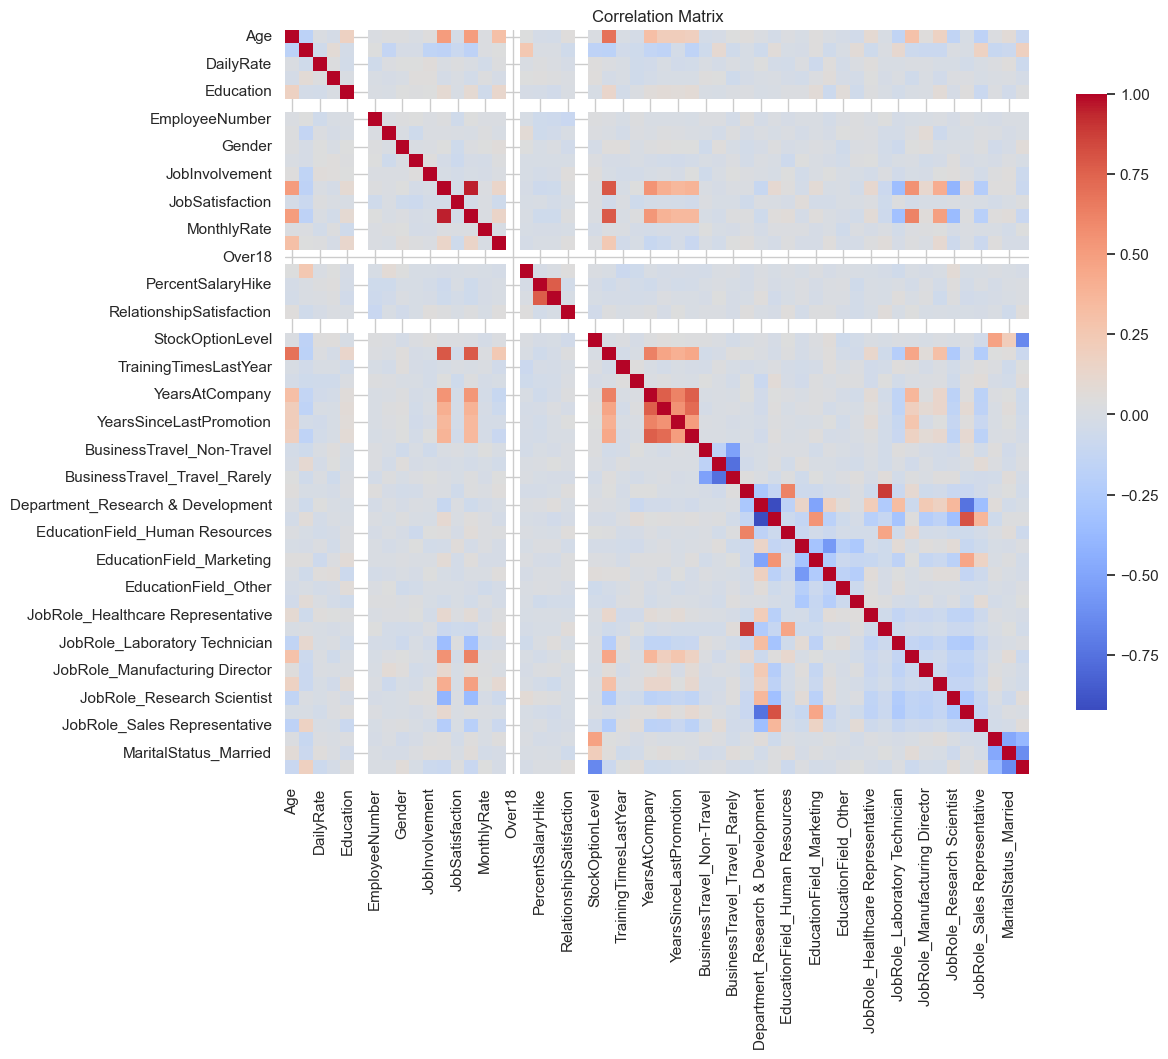

In [39]:
# Make a correlation matrix and print save it to a file
def plot_correlation_matrix(data):
    # Calculate the correlation matrix
    corr = data.corr()
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))
    # Draw the heatmap without annotations
    sns.heatmap(corr, cmap='coolwarm', annot=False, square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix')
    plt.savefig('correlation_matrix.png')
    plt.show()
# Plot the correlation matrix
plot_correlation_matrix(data)

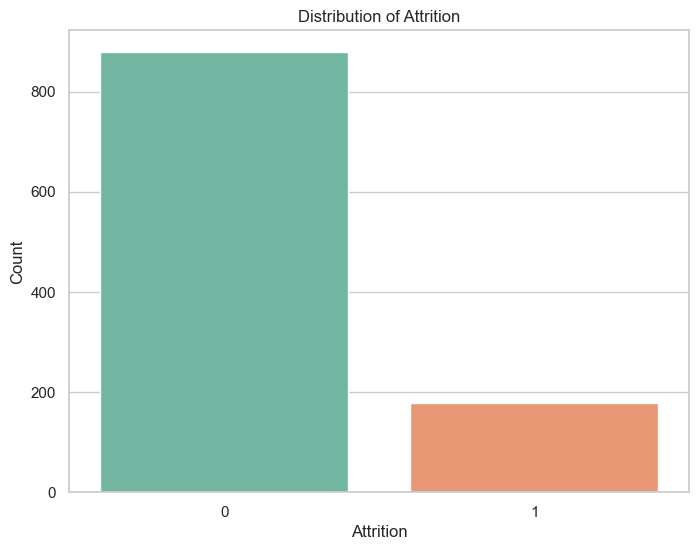

In [44]:
# Plot the distribution of the target variable
def plot_target_distribution(data):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Attrition', data=data, palette='Set2')
    plt.title('Distribution of Attrition')
    plt.xlabel('Attrition')
    plt.ylabel('Count')
    plt.savefig('target_distribution.png')
    plt.show()
# Plot the target distribution
plot_target_distribution(data)